In [1]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("../data/odwp/odwp/odwp01ew/ODWP01EW_LTLA.csv")

In [5]:
df.head()

,Lower tier local authorities code,Lower tier local authorities label,LTLA of workplace code,LTLA of workplace label,Place of work indicator (4 categories) code,Place of work indicator (4 categories) label,Count
0,E06000001,Hartlepool,-8,Does not apply,-8,Does not apply,36937
1,E06000001,Hartlepool,888888888,Workplace is offshore installation,2,"Other (including offshore installation, workin...",372
2,E06000001,Hartlepool,999999999,Workplace is outside the UK,2,"Other (including offshore installation, workin...",186
3,E06000001,Hartlepool,E06000001,Hartlepool,1,"Mainly working at or from home, No fixed place",11804
4,E06000001,Hartlepool,E06000001,Hartlepool,3,Working in the UK but not working at or from home,14513


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74721 entries, 0 to 74720
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Lower tier local authorities code             74721 non-null  object
 1   Lower tier local authorities label            74721 non-null  object
 2   LTLA of workplace code                        74721 non-null  object
 3   LTLA of workplace label                       74721 non-null  object
 4   Place of work indicator (4 categories) code   74721 non-null  int64 
 5   Place of work indicator (4 categories) label  74721 non-null  object
 6   Count                                         74721 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 4.0+ MB


In [7]:
import geopandas as gpd

In [8]:
gdf = gpd.read_file("../data/London_borough.zip", driver="ESRI Shapefile")

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        33 non-null     object  
 1   GSS_CODE    33 non-null     object  
 2   HECTARES    33 non-null     float64 
 3   NONLD_AREA  33 non-null     float64 
 4   ONS_INNER   33 non-null     object  
 5   SUB_2009    0 non-null      float64 
 6   SUB_2006    0 non-null      float64 
 7   geometry    33 non-null     geometry
dtypes: float64(4), geometry(1), object(3)
memory usage: 2.2+ KB


<Axes: >

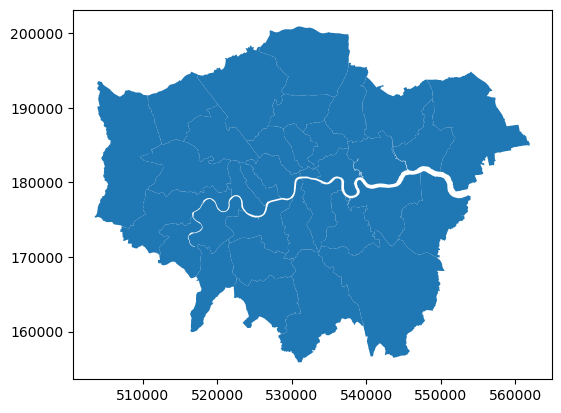

In [10]:
gdf.plot()

In [11]:
gdf.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [12]:
gdf = gdf[['GSS_CODE', 'geometry']]

In [13]:
df = df[df['Lower tier local authorities code'].str.startswith('E')].reset_index(drop=True)
df = df[df['LTLA of workplace code'].str.startswith('E')].reset_index(drop=True)

In [14]:
df = df[df['Lower tier local authorities code'].isin(gdf['GSS_CODE'])].reset_index(drop=True)
df = df[df['LTLA of workplace code'].isin(gdf['GSS_CODE'])].reset_index(drop=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Lower tier local authorities code             1120 non-null   object
 1   Lower tier local authorities label            1120 non-null   object
 2   LTLA of workplace code                        1120 non-null   object
 3   LTLA of workplace label                       1120 non-null   object
 4   Place of work indicator (4 categories) code   1120 non-null   int64 
 5   Place of work indicator (4 categories) label  1120 non-null   object
 6   Count                                         1120 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 61.4+ KB


In [16]:
df = df[['Lower tier local authorities code', 'LTLA of workplace code', 'Count']]
df.rename(columns={'Lower tier local authorities code': 'origin', 'LTLA of workplace code': 'destination', 'Count': 'flow'}, inplace=True)

In [17]:
df.head()

,origin,destination,flow
0,E09000001,E09000001,3871
1,E09000001,E09000001,436
2,E09000001,E09000002,2
3,E09000001,E09000003,6
4,E09000001,E09000004,3


In [18]:
gdf.head()

,GSS_CODE,geometry
0,E09000021,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,E09000008,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,E09000006,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,E09000018,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,E09000009,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [19]:
centroid = gdf.geometry.centroid

In [20]:
gdf['centroid'] = centroid

In [21]:
gdf.head()

,GSS_CODE,geometry,centroid
0,E09000021,"POLYGON ((516401.600 160201.800, 516407.300 16...",POINT (519297.635 166820.011)
1,E09000008,"POLYGON ((535009.200 159504.700, 535005.500 15...",POINT (533290.154 163541.244)
2,E09000006,"POLYGON ((540373.600 157530.400, 540361.200 15...",POINT (542895.512 165655.521)
3,E09000018,"POLYGON ((521975.800 178100.000, 521967.700 17...",POINT (513515.506 175643.224)
4,E09000009,"POLYGON ((510253.500 182881.600, 510249.900 18...",POINT (515887.938 181715.496)


In [22]:
gdf = gdf.drop(columns=['geometry'])

In [23]:
gdf = gdf[['GSS_CODE', 'centroid']]

In [24]:
gdf.head()

,GSS_CODE,centroid
0,E09000021,POINT (519297.635 166820.011)
1,E09000008,POINT (533290.154 163541.244)
2,E09000006,POINT (542895.512 165655.521)
3,E09000018,POINT (513515.506 175643.224)
4,E09000009,POINT (515887.938 181715.496)


In [25]:
gdf.rename(columns={'centroid': 'geometry'}, inplace=True)

<Axes: >

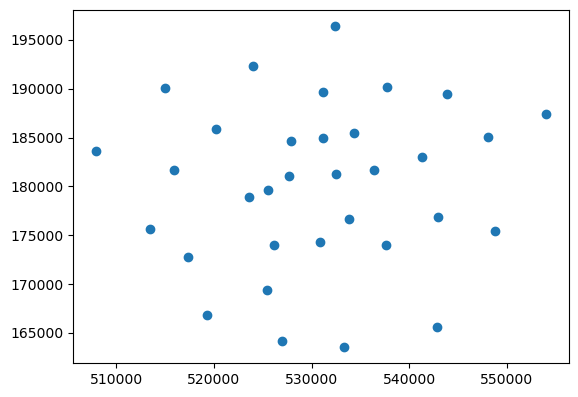

In [26]:
gdf.plot()

In [27]:
df.head()

,origin,destination,flow
0,E09000001,E09000001,3871
1,E09000001,E09000001,436
2,E09000001,E09000002,2
3,E09000001,E09000003,6
4,E09000001,E09000004,3


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   origin       1120 non-null   object
 1   destination  1120 non-null   object
 2   flow         1120 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 26.4+ KB


In [29]:
gdf['x'] = gdf['geometry'].x
gdf['y'] = gdf['geometry'].y

In [30]:
df_coords = gdf.drop(columns=['geometry'])

In [31]:
merged_df = df.merge(df_coords, how='left', left_on='origin', right_on='GSS_CODE')

In [32]:
merged_df.head()

,origin,destination,flow,GSS_CODE,x,y
0,E09000001,E09000001,3871,E09000001,532479.633543,181271.833312
1,E09000001,E09000001,436,E09000001,532479.633543,181271.833312
2,E09000001,E09000002,2,E09000001,532479.633543,181271.833312
3,E09000001,E09000003,6,E09000001,532479.633543,181271.833312
4,E09000001,E09000004,3,E09000001,532479.633543,181271.833312


In [33]:
merged_df.rename(columns={'x': 'ox', 'y': 'oy'}, inplace=True)

In [34]:
df_od_flow = merged_df.merge(df_coords, how='left', left_on='destination', right_on='GSS_CODE')

In [35]:
df_od_flow.rename(columns={'x': 'dx', 'y': 'dy'}, inplace=True)

In [36]:
df_od_flow = df_od_flow[['origin', 'ox', 'oy', 'destination', 'dx', 'dy', 'flow']]

In [37]:
df_od_flow.head()

,origin,ox,oy,destination,dx,dy,flow
0,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,3871
1,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,436
2,E09000001,532479.633543,181271.833312,E09000002,548040.122277,185087.790195,2
3,E09000001,532479.633543,181271.833312,E09000003,524027.594903,192316.339761,6
4,E09000001,532479.633543,181271.833312,E09000004,548794.417061,175487.156077,3


In [38]:
from shapely.geometry import LineString
df_od_flow['geometry'] = df_od_flow.apply(lambda r:LineString([[r['ox'],r['oy']],[r['dx'],r['dy']]]),axis = 1)
df_od_flow = gpd.GeoDataFrame(df_od_flow)

In [39]:
#df_od_flow_test = df_od_flow.sample(n=100, random_state=1)

In [40]:
df_od_flow.head()

,origin,ox,oy,destination,dx,dy,flow,geometry
0,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,3871,"LINESTRING (532479.634 181271.833, 532479.634 ..."
1,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,436,"LINESTRING (532479.634 181271.833, 532479.634 ..."
2,E09000001,532479.633543,181271.833312,E09000002,548040.122277,185087.790195,2,"LINESTRING (532479.634 181271.833, 548040.122 ..."
3,E09000001,532479.633543,181271.833312,E09000003,524027.594903,192316.339761,6,"LINESTRING (532479.634 181271.833, 524027.595 ..."
4,E09000001,532479.633543,181271.833312,E09000004,548794.417061,175487.156077,3,"LINESTRING (532479.634 181271.833, 548794.417 ..."


<Axes: >

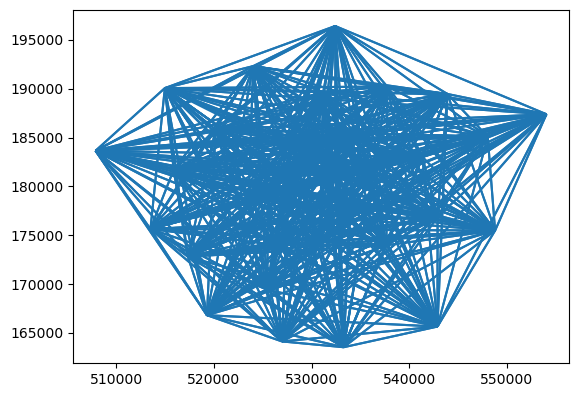

In [41]:
df_od_flow.plot()

In [42]:
df_od_flow.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   origin       1120 non-null   object  
 1   ox           1120 non-null   float64 
 2   oy           1120 non-null   float64 
 3   destination  1120 non-null   object  
 4   dx           1120 non-null   float64 
 5   dy           1120 non-null   float64 
 6   flow         1120 non-null   int64   
 7   geometry     1120 non-null   geometry
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 70.1+ KB


In [43]:
contains_zero = any(df_od_flow['flow'] == '')

if contains_zero:
    print(f"The column flow contains at least one value of 0.")
else:
    print(f"The column flow does not contain any value of 0.")

The column flow does not contain any value of 0.


In [44]:
df_od_flow

,origin,ox,oy,destination,dx,dy,flow,geometry
0,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,3871,"LINESTRING (532479.634 181271.833, 532479.634 ..."
1,E09000001,532479.633543,181271.833312,E09000001,532479.633543,181271.833312,436,"LINESTRING (532479.634 181271.833, 532479.634 ..."
2,E09000001,532479.633543,181271.833312,E09000002,548040.122277,185087.790195,2,"LINESTRING (532479.634 181271.833, 548040.122 ..."
3,E09000001,532479.633543,181271.833312,E09000003,524027.594903,192316.339761,6,"LINESTRING (532479.634 181271.833, 524027.595 ..."
4,E09000001,532479.633543,181271.833312,E09000004,548794.417061,175487.156077,3,"LINESTRING (532479.634 181271.833, 548794.417 ..."
...,...,...,...,...,...,...,...,...
1115,E09000033,527686.065085,181043.733482,E09000030,536398.886041,181634.209640,1139,"LINESTRING (527686.065 181043.733, 536398.886 ..."
1116,E09000033,527686.065085,181043.733482,E09000031,537758.137179,190223.388304,82,"LINESTRING (527686.065 181043.733, 537758.137 ..."
1117,E09000033,527686.065085,181043.733482,E09000032,526113.629998,174045.077922,649,"LINESTRING (527686.065 181043.733, 526113.630 ..."
1118,E09000033,527686.065085,181043.733482,E09000033,527686.065085,181043.733482,65572,"LINESTRING (527686.065 181043.733, 527686.065 ..."


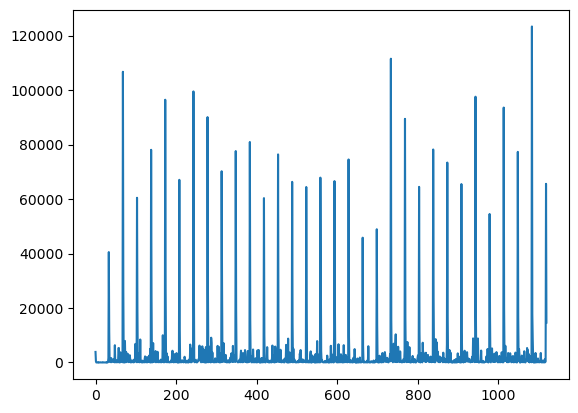

In [45]:
import matplotlib.pyplot as plt

plt.plot(df_od_flow.index, df_od_flow.flow)

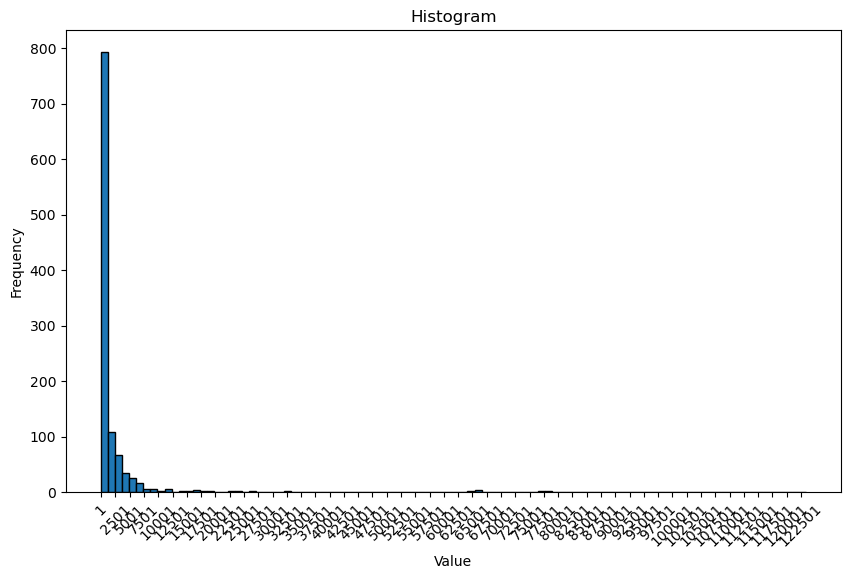

In [46]:
import numpy as np

plt.figure(figsize=(10, 6))
hist, edges, _ = plt.hist(df_od_flow.flow, bins=100, edgecolor='black')
plt.xticks(np.arange(edges.min(), edges.max(), 2500), rotation=45)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [256]:
filtered_df = df_od_flow[df_od_flow['flow'] > 5000]
filtered_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 115 entries, 33 to 1119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   origin       115 non-null    object  
 1   ox           115 non-null    float64 
 2   oy           115 non-null    float64 
 3   destination  115 non-null    object  
 4   dx           115 non-null    float64 
 5   dy           115 non-null    float64 
 6   flow         115 non-null    int64   
 7   geometry     115 non-null    geometry
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 8.1+ KB


In [257]:
filtered_df = filtered_df.reset_index(drop=True)

In [258]:
min_value = filtered_df['flow'].min()
max_value = filtered_df['flow'].max()

filtered_df['flow_normalize'] = (filtered_df['flow'] - min_value) / (max_value - min_value)

<Axes: >

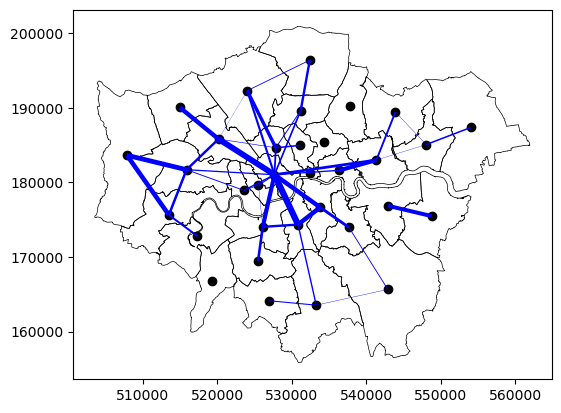

In [259]:
London_borough = gpd.read_file("../data/London_borough.zip", driver="ESRI Shapefile")
ax = gdf.plot(color='black')
filtered_df.plot(ax=ax, linewidth=filtered_df['flow_normalize'] * 100, color='blue')
London_borough.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

In [260]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [261]:
filtered_df.plot(ax=ax, color='lightgray', linewidth=2)

<Axes: >

<Figure size 640x480 with 0 Axes>

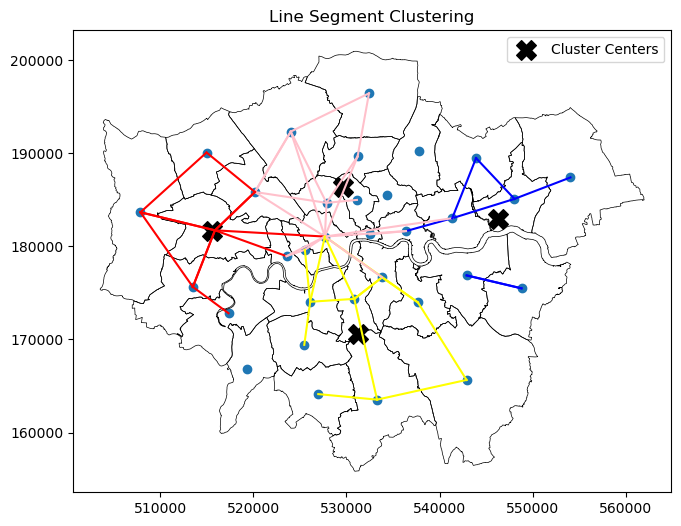

In [352]:
# 将线段数据的坐标转为 NumPy 数组
lines_array = filtered_df[['ox', 'oy', 'dx', 'dy']].values

# 使用 KMeans 聚类
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(lines_array)

# 获取聚类结果和聚类中心
labels = kmeans.labels_
centers = kmeans.cluster_centers_

colors = ['red', 'blue', 'yellow', 'pink']

# 绘制聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制原始线段
gdf.plot(ax=ax)
#filtered_df.plot(ax=ax, linewidth = filtered_df['flow_normalize'] * 100)
London_borough.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

# 绘制聚类中心
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Cluster Centers')

# 绘制聚类结果
for i, label in enumerate(labels):
    plt.plot([lines_array[i, 0], lines_array[i, 2]], [lines_array[i, 1], lines_array[i, 3]], color=colors[label])

plt.legend()
plt.title('Line Segment Clustering')
plt.show()

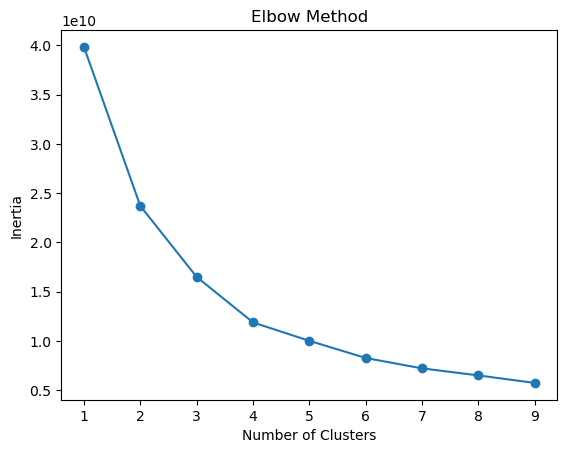

In [263]:
# 肘部法则
inertia_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(lines_array)
    inertia_values.append(kmeans.inertia_)

# 绘制肘部法则图
plt.plot(range(1, 10), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

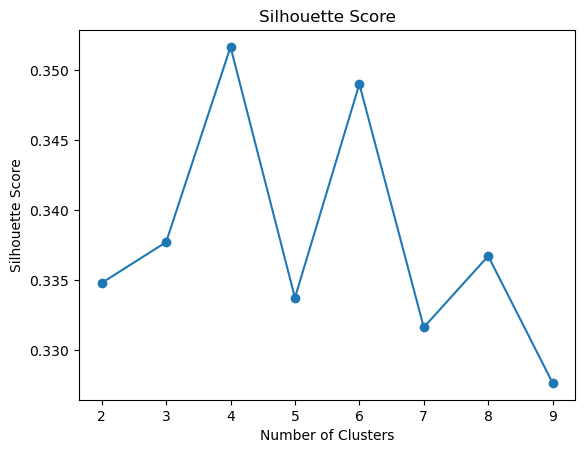

In [264]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(lines_array)
    silhouette_scores.append(silhouette_score(lines_array, labels))

# 绘制轮廓系数图
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [353]:
# 轮廓系数
silhouette_avg = silhouette_score(lines_array, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.35164628256099995


In [354]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(lines_array, labels)
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 87.15380714130484


In [355]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(lines_array, labels)
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 0.8942002315953571


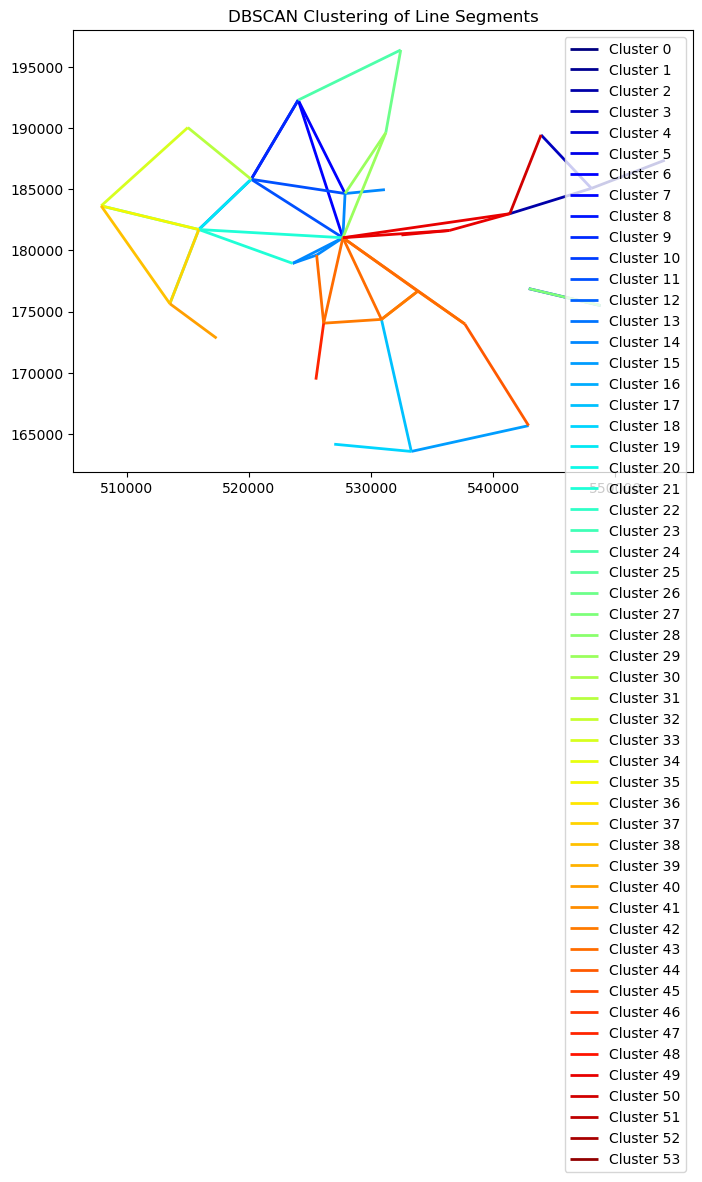

In [348]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 使用 StandardScaler 进行特征缩放
scaler = StandardScaler()
features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])

# 使用 DBSCAN 进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=1)
filtered_df['DBSCAN_cluster'] = dbscan.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.jet(i / len(filtered_df['DBSCAN_cluster'].unique())) for i, label in enumerate(filtered_df['DBSCAN_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['DBSCAN_cluster'].unique():
    subset = filtered_df[filtered_df['DBSCAN_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('DBSCAN Clustering of Line Segments')
plt.show()


In [349]:
# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['DBSCAN_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.44274354122166165


In [350]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['DBSCAN_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 42.095175602856074


In [351]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['DBSCAN_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 0.3869081117127429


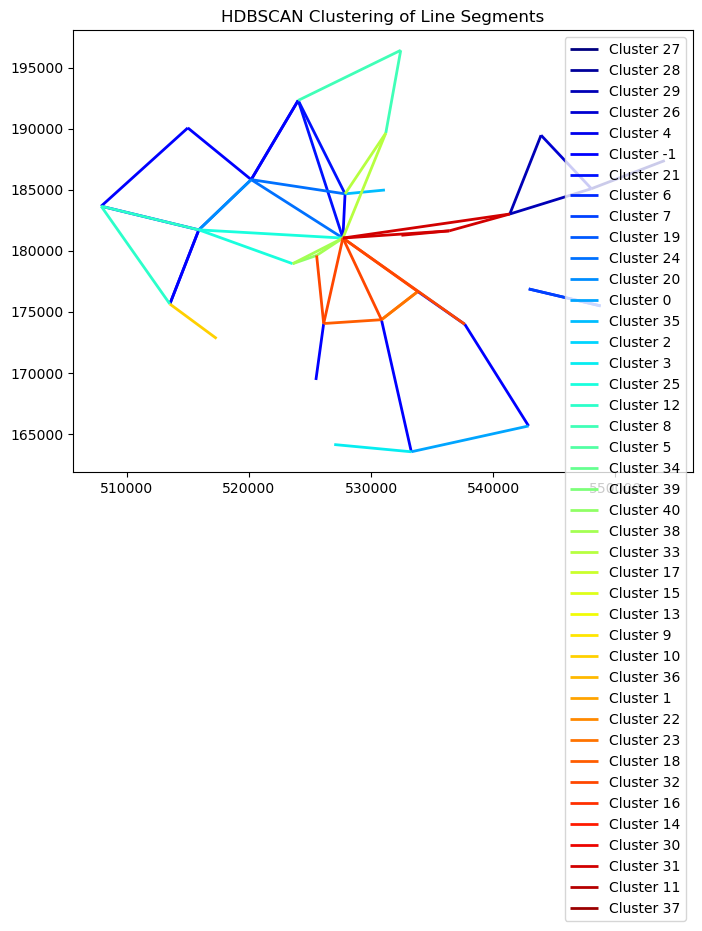

In [376]:
import hdbscan

# 使用 StandardScaler 进行特征缩放
scaler = StandardScaler()
features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])

# 使用 HDBSCAN 进行聚类
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1)
filtered_df['HDBSCAN_cluster'] = clusterer.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.jet(i / len(filtered_df['HDBSCAN_cluster'].unique())) for i, label in enumerate(filtered_df['HDBSCAN_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['HDBSCAN_cluster'].unique():
    subset = filtered_df[filtered_df['HDBSCAN_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('HDBSCAN Clustering of Line Segments')
plt.show()

In [377]:
# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['HDBSCAN_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4461415763762451


In [378]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['DBSCAN_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 42.095175602856074


In [379]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['DBSCAN_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 0.3869081117127429


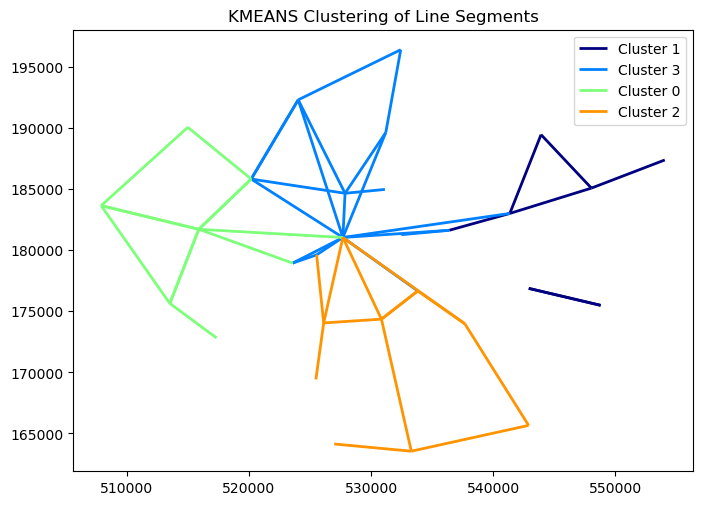

In [281]:
# 使用 StandardScaler 进行特征缩放
# scaler = StandardScaler()
# features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])
features = filtered_df[['ox', 'oy', 'dx', 'dy']]

# 使用 KMEANS 进行聚类
kmeans = KMeans(n_clusters=4, random_state=42)
filtered_df['KMEANS_cluster'] = kmeans.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.jet(i / len(filtered_df['KMEANS_cluster'].unique())) for i, label in enumerate(filtered_df['KMEANS_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['KMEANS_cluster'].unique():
    subset = filtered_df[filtered_df['KMEANS_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('KMEANS Clustering of Line Segments')
plt.show()

In [282]:
# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['KMEANS_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.35164628256099995


In [283]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['KMEANS_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 87.15380714130484


In [284]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['KMEANS_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 0.8942002315953571


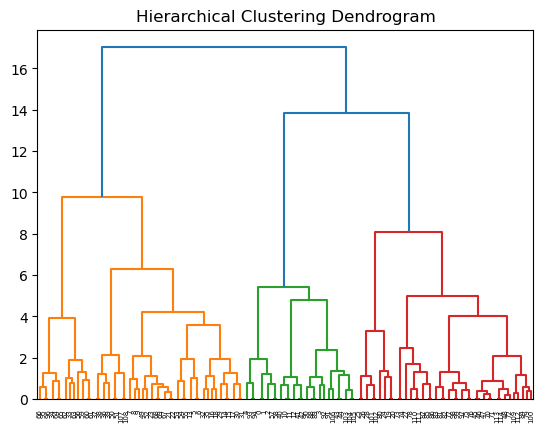

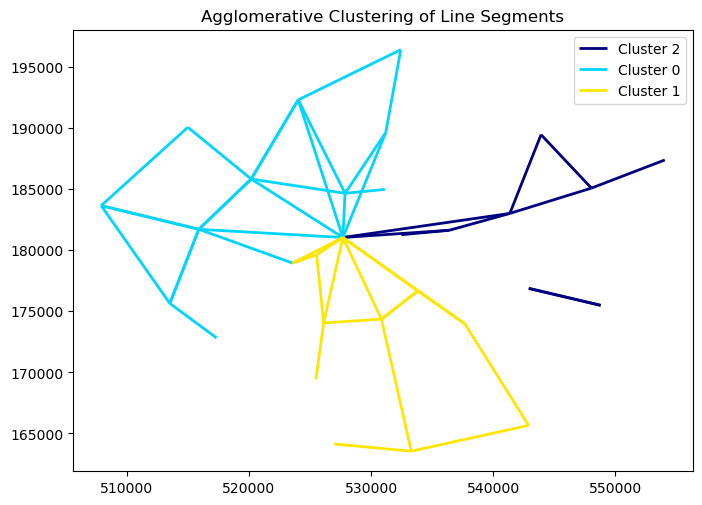

In [285]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# 使用 StandardScaler 进行特征缩放
scaler = StandardScaler()
features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])

# 计算成对样本之间的欧氏距离
distances = pdist(features)

# 计算层次聚类的链接矩阵
linkage_matrix = linkage(distances, method='ward')

# 使用 dendrogram 可视化树状图
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# 使用 AgglomerativeClustering 获取聚类标签
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=10).fit(features)
labels = clustering.labels_

# 将聚类标签添加到 GeoDataFrame
filtered_df['Agglomerative_cluster'] = labels

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.jet(i / len(filtered_df['Agglomerative_cluster'].unique())) for i, label in enumerate(filtered_df['Agglomerative_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['Agglomerative_cluster'].unique():
    subset = filtered_df[filtered_df['Agglomerative_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('Agglomerative Clustering of Line Segments')
plt.show()


In [286]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['Agglomerative_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2964558489878498


In [287]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['Agglomerative_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 61.576114515443386


In [288]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['Agglomerative_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 1.045058263375471


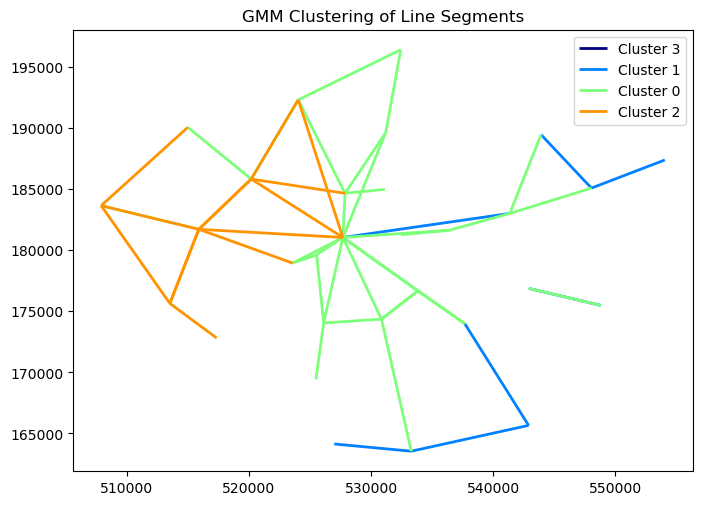

In [293]:
from sklearn.mixture import GaussianMixture

# 使用 StandardScaler 进行特征缩放
# scaler = StandardScaler()
# features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])
features = filtered_df[['ox', 'oy', 'dx', 'dy']]

# 使用 GaussianMixture 进行聚类
gmm = GaussianMixture(n_components=4, random_state=42)
filtered_df['GMM_cluster'] = gmm.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.jet(i / len(filtered_df['GMM_cluster'].unique())) for i, label in enumerate(filtered_df['GMM_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['GMM_cluster'].unique():
    subset = filtered_df[filtered_df['GMM_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('GMM Clustering of Line Segments')
plt.show()


In [294]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['GMM_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.0960829087259125


In [295]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['GMM_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 6.837675278556376


In [296]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['GMM_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 7.410183067794206


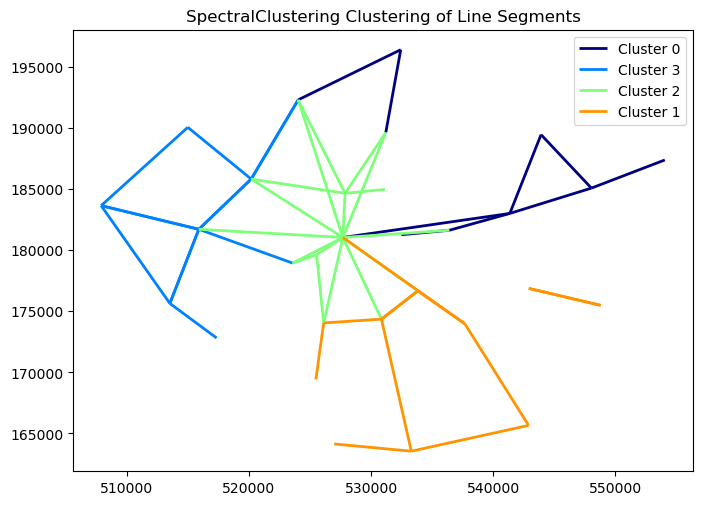

In [298]:
from sklearn.cluster import SpectralClustering

# 使用 StandardScaler 进行特征缩放
scaler = StandardScaler()
features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])

# 使用 SpectralClustering 进行聚类
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
filtered_df['SpectralClustering_cluster'] = spectral.fit_predict(features)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.jet(i / len(filtered_df['SpectralClustering_cluster'].unique())) for i, label in enumerate(filtered_df['SpectralClustering_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df['SpectralClustering_cluster'].unique():
    subset = filtered_df[filtered_df['SpectralClustering_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('SpectralClustering Clustering of Line Segments')
plt.show()


In [299]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_avg = silhouette_score(features, filtered_df['SpectralClustering_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.24814949453825613


In [300]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz 指数
ch_score = calinski_harabasz_score(features, filtered_df['SpectralClustering_cluster'])
print("Calinski-Harabasz Score:", ch_score)

Calinski-Harabasz Score: 61.7206169220087


In [301]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin 指数
db_score = davies_bouldin_score(features, filtered_df['SpectralClustering_cluster'])
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 1.1190173513341535


In [302]:
pip install traclus-python==1.0.1

Note: you may need to restart the kernel to use updated packages.


In [303]:
scaler = StandardScaler()
features = scaler.fit_transform(filtered_df[['ox', 'oy', 'dx', 'dy']])
df_result = pd.DataFrame(features, columns=['ox', 'oy', 'dx', 'dy'])

In [304]:
# 定义一个函数将每一行的数据转换为所需的格式
def row_to_array(row):
    return np.array([[row['ox'], row['oy']], [row['dx'], row['dy']]])

# 使用 apply 方法将每一行的数据应用到函数，并将结果放入一个列表中
result_list = df_result.apply(row_to_array, axis=1).tolist()

In [373]:
from traclus import traclus as tr

trajectories = result_list

partitions, segments, dist_matrix, clusters, cluster_assignments, representative_trajectories = tr.traclus(trajectories, d_weights = [1, 1, 1], max_eps=5, min_samples=2, directional=False)

cluster_assignments

array([ 0,  0,  0, -1, -1,  1,  1,  2,  3,  3,  4,  4,  5,  2,  7,  7, -1,
        8, -1,  9,  9, 10, 10, -1, -1, 19, 19, -1, -1,  8, 20, 20, -1, 22,
       21, -1, -1, 23, 23, 18,  5,  6,  6, 12, 12, 16, 16, 14, 14, 17, 18,
       18, 17, -1, 24, 24, -1, 25, 25, 22, 26, 26, 21, -1, 27, 27, 28, -1,
       11, 11, 15, 15, 14, 29, 29, 30, 30, 36, -1, -1, -1, 35, 35, -1, -1,
       33, 33, -1, 37, 37, -1, 39, -1, 40, 40, 28, 28, 36, 34, 34, -1, 41,
       41, 39, 38, 38, 39, 42, 42, 32, 31, 31, 32, 13, 13])

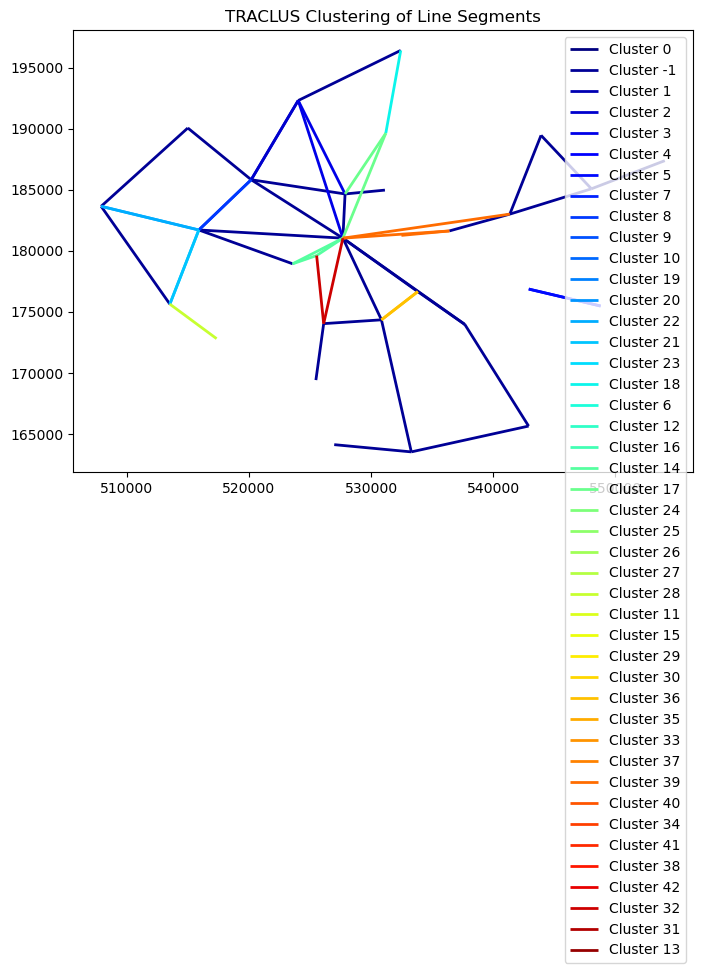

In [374]:
cluster_series = pd.Series(cluster_assignments, name='TRACLUS_cluster')
filtered_df_test = pd.concat([filtered_df, cluster_series], axis=1)

# 为每个簇分配唯一颜色
cluster_colors = {label: plt.cm.jet(i / len(filtered_df_test['TRACLUS_cluster'].unique())) for i, label in enumerate(filtered_df_test['TRACLUS_cluster'].unique())}

# 可视化聚类结果
fig, ax = plt.subplots(figsize=(8, 6))

# 根据簇标签绘制不同颜色的线条
for label in filtered_df_test['TRACLUS_cluster'].unique():
    subset = filtered_df_test[filtered_df_test['TRACLUS_cluster'] == label]
    color = cluster_colors[label]
    subset.plot(ax=ax, color=color, linewidth=2, label=f'Cluster {label}')

# 添加图例
ax.legend()

plt.title('TRACLUS Clustering of Line Segments')
plt.show()

In [375]:
from sklearn.metrics import silhouette_score

# 轮廓系数
silhouette_avg = silhouette_score(df_result, filtered_df_test['TRACLUS_cluster'])
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3829298573757321
